
 Statistics of X features: 
       plist-sz  totsck  ldavg-1   pgfree/s  proc/s  all_%%usr  file-nr  \
mean    875.69  484.52    73.30  150234.32    8.00      86.22  2580.47   
std     267.28  132.24    48.20   30798.85    9.03      18.15   184.89   
min     404.00  241.00     1.79     180.00    0.00       1.96  2112.00   
25%     611.00  354.00    20.62  131677.25    0.00      74.73  2400.00   
50%     837.00  469.00    65.01  148475.50    6.00      96.88  2592.00   
90%    1253.20  672.00   135.70  185566.70   21.00      97.50  2832.00   

       cswch/s  %%memused  runq-sz  
mean  52519.94      13.27    63.41  
std   20576.24       1.86    37.08  
min    2730.00       6.19     0.00  
25%   29381.00      12.23    21.00  
50%   63336.00      13.00    66.00  
90%   72283.70      15.83   111.00  

 Statistics of Y features: 
       DispFrames
mean       18.88
std         5.46
min         0.00
25%        13.39
50%        20.27
90%        24.00

 Number of observations with CPU utilizati

<Figure size 432x288 with 0 Axes>

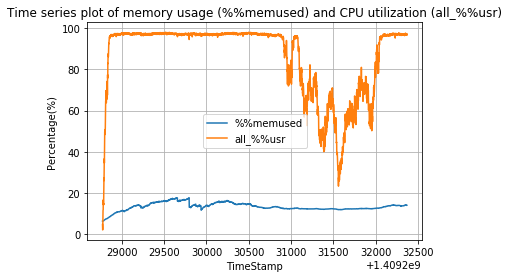

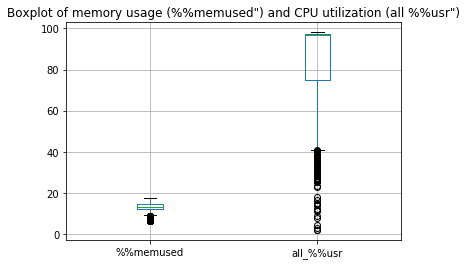

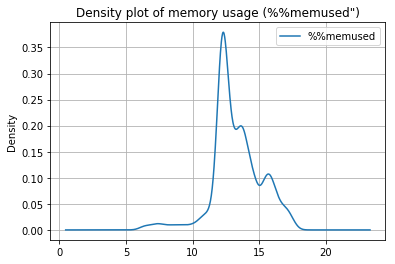

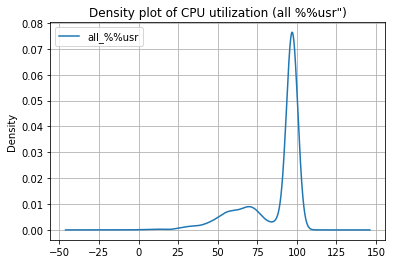

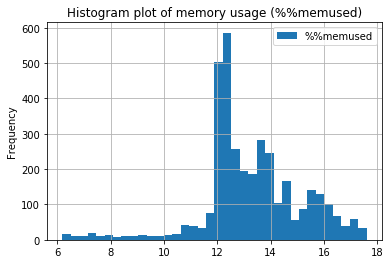

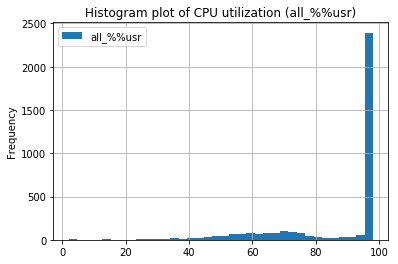

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

#TASK 1.1
#Importing the datasets X and Y
X=pd.read_csv('X.csv')
Y=pd.read_csv('Y.csv')

#Compute statistics for each feature of X and Y
X_OUTPUT=X.describe(percentiles=[0.25,0.9]).round(decimals=2).iloc[1:7,:10]
print("\n Statistics of X features: \n", X_OUTPUT)

Y_OUTPUT=Y.describe(percentiles=[0.25,0.9]).round(decimals=2).iloc[1:7,[1]]
print("\n Statistics of Y features: \n",Y_OUTPUT)



#Task 2.1
#Number of observations with CPU utilization (“all %%usr”) smaller than 90% and memory utilization (“%%memused”) smaller than 50%
No_of_obs= X[(X['all_%%usr']<90) & (X['%%memused']<50)].count()
print("\n Number of observations with CPU utilization (“all %%usr”) smaller than 90% and memory utilization (“%%memused”) smaller than 50% : ",No_of_obs[1])

#The average number of used sockets (“totsck”) for observations with less than 60 000 context switches per seconds (“cswch/s”)
Z=X[X['cswch/s']<60000]
print("\n The average number of used sockets (“totsck”) for observations with less than 60 000 context switches per seconds (“cswch/s”) : ",Z['totsck'].mean())



#Task 1.3
#Task 1.3(a)
#Time series of memory usage (\%%memused") and CPU utilization (\all %%usr"), both curves in a single plot
mpl.figure()
TS_Plot1=X.plot(x="TimeStamp",y=["%%memused","all_%%usr"])
TS_Plot1.set_title('Time series plot of memory usage (%%memused) and CPU utilization (all_%%usr)')
TS_Plot1.grid()
TS_Plot1.set_ylabel('Percentage(%)')


#Boxplot of memory usage (%%memused") and CPU utilization (all %%usr")
boxplot1= X.plot.box(y=["%%memused","all_%%usr"])
boxplot1.set_title('Boxplot of memory usage (%%memused") and CPU utilization (all %%usr")')
boxplot1.grid()



#Task 1.3(b)
#Density plot of memory usage (“%%memused”)
Den_plot1= X.plot.kde(y=["%%memused"])
Den_plot1.set_title('Density plot of memory usage (%%memused")')
Den_plot1.grid()

#Density plot of CPU utilization (“all %%usr”)
Den_plot2= X.plot.kde(y=["all_%%usr"])
Den_plot2.set_title('Density plot of CPU utilization (all %%usr")')
Den_plot2.grid()

#Histogram plots of memory usage (“%%memused”)

#Range_memused=X['%%memused'].max()-X['%%memused'].min()
#print("Range memused : ",Range_memused)
#bin_size= 0.01*Range_memused;
#print("BIN SIZE for memused: ",int(round(bin_size)))
#print("Range mem : ",Range_memused)
Hist1 = X.plot.hist(y=["%%memused"],bins=36)
Hist1.set_title('Histogram plot of memory usage (%%memused)')
Hist1.grid()

#Histogram plots of CPU utilization (“all %%usr”)

#Range_allusr=X['all_%%usr'].max()- X['all_%%usr'].min()
#print("Range allusr : ",Range_allusr)
#bin_size2= 0.01*Range_allusr;
#print("BIN SIZE for allusr",int(round(bin_size2)))

Hist2 = X.plot.hist(y=["all_%%usr"],bins=36)
Hist2.set_title('Histogram plot of CPU utilization (all_%%usr)')
Hist2.grid()


Coefficients limited to 3 significant digits : 
  [-1.43e-02 -1.35e-03  1.91e-03 -5.07e-06 -5.96e-03  8.96e-02 -3.38e-03
 -7.67e-05  4.25e-01 -1.41e-02]
Intercept in the linear regression model :  33.04886018304596
Mean Absolute error: 2.01
Mean of Y test set observations :  18.61513
Normalised Mean Absolute Error :  0.10784

NAIVE METHOD RESULTS: 
Mean Absolute error: 5.00
Mean of Y train set observations :  18.99962
Normalised Mean Absolute Error for Naive method :  0.26327


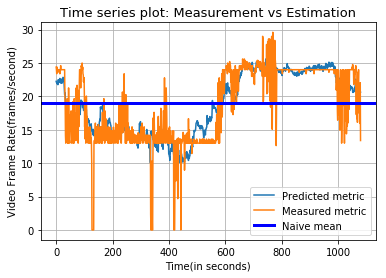


 X training set length :  50 	 NMAE :  0.11180094609530616

 X training set length :  100 	 NMAE :  0.10579775055169485

 X training set length :  200 	 NMAE :  0.10116145012192526

 X training set length :  500 	 NMAE :  0.10091058215602101

 X training set length :  1000 	 NMAE :  0.10285549635513944

 X training set length :  2520 	 NMAE :  0.10028481932127198


Text(0,0.5,'NMAE')

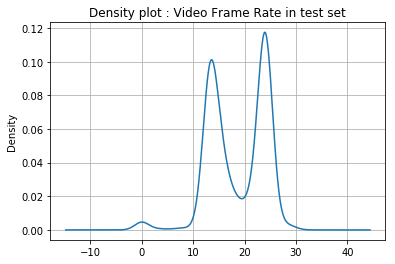

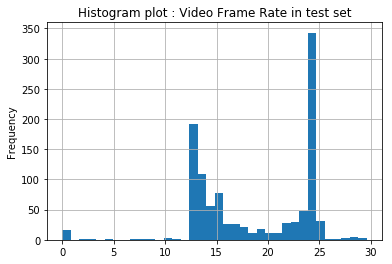

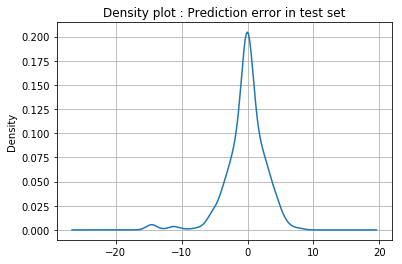

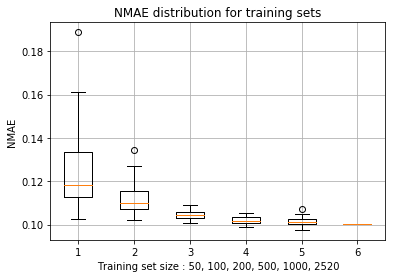

In [9]:
#TASK 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.markers as mr
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


#TASK 2.1 - EVALUATION OF ACCURACY OF SERVICE METRIC ESTIMATION

X_temp= pd.read_csv('X.csv')  #load the datasets X and Y
Y_temp= pd.read_csv('Y.csv')

X= X_temp.drop(labels='TimeStamp', axis='columns')  #drop Timestamp from X as timestamp is not a feature of X
Y= Y_temp.drop(labels='TimeStamp',axis='columns')   #drop Timestamp from Y as timestamp is not a feature of Y
Y=Y.iloc[:,1] # Removing the UNAMED column and retaining the 2nd column of data frame (DispFrames)

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1080, train_size=2520, random_state=42)

#create an object 'regr' for linear regression 
regr_obj= linear_model.LinearRegression()

#train the model with training set X and Y
regr_obj.fit(X_train,y_train)

pd.DataFrame(regr_obj.coef_,X.columns,columns=['Estimated Coefficients'])

#Coefficients limited to 3 significant digits
np.set_printoptions(precision=2)
print("Coefficients limited to 3 significant digits : \n ", regr_obj.coef_ )
print("Intercept in the linear regression model : ", regr_obj.intercept_)


# TASK 2.1(b)

#Make prediction using the testing set X
y_predict=regr_obj.predict(X_test)
MAE=mean_absolute_error(y_test,y_predict)
NMAE=(MAE/y_test.mean())                                  #Normalised Mean Absolute Error
print("Mean Absolute error: %.2f" % round(MAE,5))
print("Mean of Y test set observations : ",round(y_test.mean(),5))
print("Normalised Mean Absolute Error : ", round(NMAE,5) )


#NAIVE METHOD 

naive_mean= y_train.mean()
naive_list=[]
for i in range(0,2520):
    naive_list.append(naive_mean)
naive_df = pd.DataFrame(naive_list,columns=['naive mean'])
naive_MAE= mean_absolute_error(y_train,naive_df)
naive_NMAE= naive_MAE/naive_mean
print("\nNAIVE METHOD RESULTS: \nMean Absolute error: %.2f" % round(naive_MAE,5))
print("Mean of Y train set observations : ",round(naive_mean,5))
print("Normalised Mean Absolute Error for Naive method : ", round(naive_NMAE,5))

#TASK 2.1(c)
#preparation of y_predict and y_test by sorting indices
y_predict_df=pd.DataFrame({'Index':y_test.index,'y_predict':y_predict})

y_test_copy=y_test.copy(deep=True)
y_test_copy.sort_index(inplace=True)
y_predict_df_sorted=y_predict_df.sort_values(y_predict_df.columns[0],ascending=True)

y_test_copy_sorted=y_test_copy.reset_index()
y_predict_df_sorted=y_predict_df_sorted.reset_index()

y_predict_df_sorted= y_predict_df_sorted.drop(labels=['index','Index'], axis='columns')
y_test_copy_sorted= y_test_copy_sorted.drop(labels=['index'], axis='columns')

# Plot of measurement and estimation on Test set
mpl.figure()
mpl.title("Time series plot: Measurement vs Estimation",fontsize=13)
mpl.xlabel("Time(in seconds)")
mpl.ylabel("Video Frame Rate(frames/second)")
mpl.plot(y_predict_df_sorted.index,y_predict_df_sorted,label='linear')
mpl.plot(y_test_copy_sorted.index,y_test_copy_sorted,label='linear')
mpl.axhline(xmin=0,xmax=1080,y=naive_mean,linewidth=3,color='b',label="Naive mean")
mpl.legend(('Predicted metric','Measured metric','Naive mean'),loc=4)
mpl.grid()
mpl.show() 

# Scatter plot ()
# mpl.figure();
# mpl.xlabel("Time(in seconds)")
# mpl.ylabel("Video Frame Rate(frames/second)")
# timeseries=mpl.scatter(np.linspace(1,1080,1080),y_test, facecolors='none', edgecolors='g', marker="o", s=15, label='Measured metric')
# timeseries=mpl.scatter(np.linspace(1,1080,1080),y_predict, facecolors='none', edgecolors='r', marker="v", s=15, label="Prediction metric")
# timeseries=mpl.axhline(xmin=0,xmax=1080,y=naive_mean,linewidth=3,color='b',label="Naive mean")
# timeseries=mpl.legend(loc='best')
# timeseries=mpl.title('Time series plot: Measurement vs Estimation')
# mpl.grid()

#TASK 2.1(d) 
#Density plot for video frame rate in test set
mpl.figure()
dp = y_test.plot.kde(y=["DispFrames"])
dp.set_title('Density plot : Video Frame Rate in test set')
dp.grid()

#Histogram plot for video frame rate in test set
#bin size=1(=100)
mpl.figure()
his_plot = y_test.plot.hist(y=["DispFrames"], bins=36)
his_plot.set_title('Histogram plot : Video Frame Rate in test set')
his_plot.grid()   
    
    
#TASK 2.1(e) 
#Density plot for the prediction errors in the test set.
p_err = y_test - y_predict
mpl.figure()
p_err_plot = p_err.plot.kde(y=["DispFrames"])
p_err_plot.set_title('Density plot : Prediction error in test set')
p_err_plot.grid() 


#TASK 2.2 - RELATIONSHIP BETWEEN ESTIMATION ACCURACY AND SIZE OF TRAINING SET

#Task 2.2(a) - SELECTION OF DIFFERENT TRAINING SETS

x_tr50, x_te50, y_tr50, y_te50 = train_test_split(X_train,y_train,test_size=2470)
x_tr100, x_te100, y_tr100, y_te100 = train_test_split(X_train,y_train,test_size=2420)
x_tr200, x_te200, y_tr200, y_te200 = train_test_split(X_train,y_train,test_size=2320)
x_tr500, x_te500, y_tr500, y_te500 = train_test_split(X_train,y_train,test_size=2020)
x_tr1000, x_te1000, y_tr1000, y_te1000 = train_test_split(X_train,y_train,test_size=1520)
x_tr2520 =X_train
x_te2520 =X_train
y_tr2520 = y_train
y_te2520 = y_train


#Task 2.2(b) - TRAIN LINEAR MODEL

def estimationerror(x_train,x_test,y_train,y_test):
    regr_obj=LinearRegression()
    regr_obj.fit(x_train,y_train)
    y_predict=regr_obj.predict(x_test)
    MAE = mean_absolute_error(y_test,y_predict)
    MEAN = y_test.mean();
    NMAE= MAE/MEAN
    print("\n X training set length : ",len(x_train),"\t NMAE : ",NMAE)
   
    return(NMAE)

NMAE_50=estimationerror(x_tr50,x_te50,y_tr50,y_te50)
NMAE_100=estimationerror(x_tr100,x_te100,y_tr100,y_te100)
NMAE_200=estimationerror(x_tr200,x_te200,y_tr200,y_te200)
NMAE_500=estimationerror(x_tr500,x_te500,y_tr500,y_te500)
NMAE_1000=estimationerror(x_tr1000,x_te1000,y_tr1000,y_te1000)
NMAE_2520=estimationerror(x_tr2520,x_te2520,y_tr2520,y_te2520)


#Task 2.2(c) - TRAINING EACH TRAINING SUBSET TO 50 TIMES

NMAE_50=[]
NMAE_100=[]
NMAE_200=[]
NMAE_500=[]
NMAE_1000=[]
NMAE_2520=[]

def estimationerror2(x_train,x_test,y_train,y_test):
    regr_obj=LinearRegression()
    regr_obj.fit(x_train,y_train)
    y_predict=regr_obj.predict(x_test)
    MAE = mean_absolute_error(y_test,y_predict)
    MEAN = y_test.mean();
    NMAE= MAE/MEAN
   
    return(NMAE)

for i in range(50):
    x_tr50, x_te50, y_tr50, y_te50 = train_test_split(X_train,y_train,test_size=2470)
    x_tr100, x_te100, y_tr100, y_te100 = train_test_split(X_train,y_train,test_size=2420)
    x_tr200, x_te200, y_tr200, y_te200 = train_test_split(X_train,y_train,test_size=2320)
    x_tr500, x_te500, y_tr500, y_te500 = train_test_split(X_train,y_train,test_size=2020)
    x_tr1000, x_te1000, y_tr1000, y_te1000 = train_test_split(X_train,y_train,test_size=1520)
    x_tr2520 =X_train
    x_te2520 =X_train
    y_tr2520 = y_train
    y_te2520 = y_train

    NMAE_50.append(estimationerror2(x_tr50,x_te50,y_tr50,y_te50))
    NMAE_100.append(estimationerror2(x_tr100,x_te100,y_tr100,y_te100))
    NMAE_200.append(estimationerror2(x_tr200,x_te200,y_tr200,y_te200))
    NMAE_500.append(estimationerror2(x_tr500,x_te500,y_tr500,y_te500))
    NMAE_1000.append(estimationerror2(x_tr1000,x_te1000,y_tr1000,y_te1000))
    NMAE_2520.append(estimationerror2(x_tr2520,x_te2520,y_tr2520,y_te2520))
    i+=1;


NMAE_superset=[NMAE_50,NMAE_100,NMAE_200,NMAE_500,NMAE_1000,NMAE_2520]


#TASK 2.2(d) - 
mpl.figure()
mpl.title('NMAE distribution for training sets')
mpl.boxplot(NMAE_superset)
mpl.grid()
mpl.xlabel('Training set size : 50, 100, 200, 500, 1000, 2520')
mpl.ylabel('NMAE')


Coefficients limited to 3 significant digits : 
  [[-1.16e-02 -3.94e-03 -4.54e-03  3.03e-06 -2.13e-04  5.71e-03  5.30e-03
  -3.24e-05  1.36e-03 -6.06e-03]]
Intercept in logistic model is :  [5.08e-05]
tp :  540 
fn :  43 
fp :  39 
tn :  458
Classificiation error :  0.0759
Confusion matrix, without normalization
[[458  39]
 [ 43 540]]
Normalized confusion matrix
[[0.92 0.08]
 [0.07 0.93]]


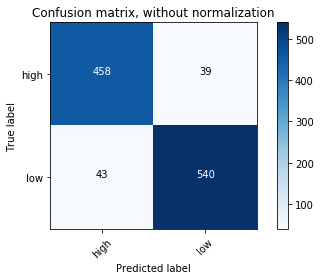

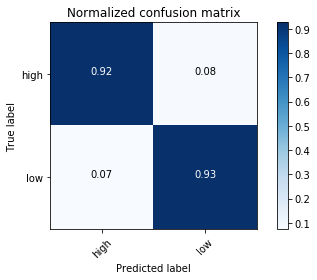

Total positives in Y Test :  583
Total negatives in Y Test :  497
NAIVE METHOD
Classification error on test set with naive method :  0.4977

CONFUSION MATRIX WITH LINEAR REGRESSION : 
tp :  554 
fn :  29 
fp :  50 
tn :  447
Classificiation error with linear regression :  0.0731


In [4]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.markers as mr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#TASK 3.1 - LOGISTIC REGRESSION TO TRAIN A CLASSIFIER C WITH TRAINING SET AND RETURN COEFFICIENTS

X_temp= pd.read_csv('X.csv')  #load the datasets X and Y
Y_temp= pd.read_csv('Y.csv')

X= X_temp.drop(labels='TimeStamp', axis='columns')  #drop Timestamp from X as timestamp is not a feature of X
Y= Y_temp.drop(labels='TimeStamp',axis='columns')   #drop Timestamp from Y as timestamp is not a feature of Y

Y=Y.iloc[:,1] # Removing the UNAMED column and retaining the 2nd column of data frame (DispFrames)
X=X.iloc[:,0:10]

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1080, train_size=2520)

y_train_classifier = (y_train> 18).astype(int)
y_test_classifier = (y_test> 18).astype(int)

#create an object 'C' for logistic regression 
C = LogisticRegression(fit_intercept=True)

#train the model with training set X and Y
C.fit(X_train,y_train_classifier)

#Coefficients limited to 3 significant digits
np.set_printoptions(precision=2)
print("Coefficients limited to 3 significant digits : \n ", C.coef_ )

print("Intercept in logistic model is : ", C.intercept_)

#TASK 3.2 - CLASSIFICATION ERROR ON TEST SET FOR CLASSIFIER C

#Make prediction using test set X
y_predict=C.predict(X_test)

#Confusion Matrix
tn,fp,fn,tp=confusion_matrix(y_test_classifier,y_predict).ravel()
print("tp : ",tp,"\nfn : ",fn,"\nfp : ",fp, "\ntn : ",tn)
m=tn+tp+fp+fn
Classification_err= 1-((tn+tp)/m)
print("Classificiation error : ", round(Classification_err,4))

#Plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix=confusion_matrix(y_test_classifier,y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['high','low'],title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high','low'], normalize=True,title='Normalized confusion matrix')
plt.show()


# TASK 3.3 - NAIVE METHOD AND ITS CLASSIFICATION ERROR

#calculate number of 1's and 0's in Y train from Y Train Classifier defined in Task 3.1
y_train_total_1=y_train_classifier[y_train_classifier==1]
y_train_total_0= y_train_classifier[y_train_classifier==0]

#calcuate probabilities of 1's and 0's in Y Train
y_train_prob_naive_1=len(y_train_total_1)/ len(y_train_classifier)
y_train_prob_naive_0=len(y_train_total_0)/ len(y_train_classifier)

#different approach,here for reference
#calculate total samples with 0's and 1's in Y Test using probabilities obtained above
#print("Naive prediction for total positives(i.e SLA >18) classified samples in Y Test : ", round(y_train_prob_naive_1*1080))
#print("Naive prediction for total negatives(i.e SLA <18) classified samples in Y Test : ", 1080-round(y_train_prob_naive_1*1080))
#calculate false positives and false negatives
#error_samples_total= abs(round(y_train_prob_naive_1*1080)-len(y_test_total_1))+abs(1080-round(y_train_prob_naive_1*1080)-len(y_test_total_0))
#print("Total Error Samples : ", error_samples_total)
#classification_err_naive= error_samples_total/len(y_test_classifier)

#True positives and negatives in Y test
y_test_total_1= y_test_classifier[y_test_classifier==1]
y_test_total_0= y_test_classifier[y_test_classifier==0]
print("Total positives in Y Test : ", len(y_test_total_1))
print("Total negatives in Y Test : ", len(y_test_total_0))

print("NAIVE METHOD")
classification_err_naive= 1-((len(y_test_total_1)*y_train_prob_naive_1+len(y_test_total_0)*y_train_prob_naive_0)/1080)
print("Classification error on test set with naive method : ",round(classification_err_naive,4))
print()


#TASK 3.4 - CLASSIFIER FOR EXTENDED LINEAR REGRESSION AND ITS CLASSIFICATION ERROR
#create an object 'regr' for linear regression 
lin_obj = LinearRegression()

#train the model with training set X and Y
lin_obj.fit(X_train,y_train)
y_predict_lin=lin_obj.predict(X_test)

y_predict_lin_classifier = (y_predict_lin> 18).astype(int)
tn_lin,fp_lin,fn_lin,tp_lin=confusion_matrix(y_test_classifier,y_predict_lin_classifier).ravel()

#Confusion matrix
print("CONFUSION MATRIX WITH LINEAR REGRESSION : \ntp : ",tp_lin,"\nfn : ",fn_lin,"\nfp : ",fp_lin, "\ntn : ",tn_lin)
m_lin=tn_lin+tp_lin+fp_lin+fn_lin
Classification_err= 1-((tn_lin+tp_lin)/m_lin)
print("Classificiation error with linear regression : ", round(Classification_err,4))

TASK 4.2 - Optimal method
Top 10 subsets with least NMAE in ascending order : 
                                             FEATURE SET      NMAE
796   (plist-sz, pgfree/s, all_%%usr, file-nr, cswch...  0.096967
936   (plist-sz, totsck, pgfree/s, all_%%usr, file-n...  0.096975
776   (plist-sz, totsck, all_%%usr, file-nr, cswch/s...  0.096978
951   (plist-sz, pgfree/s, all_%%usr, file-nr, cswch...  0.096993
1004  (plist-sz, totsck, pgfree/s, all_%%usr, file-n...  0.096993
832   (totsck, pgfree/s, all_%%usr, file-nr, cswch/s...  0.097022
875   (plist-sz, totsck, ldavg-1, all_%%usr, file-nr...  0.097034
923   (plist-sz, totsck, all_%%usr, file-nr, cswch/s...  0.097041
603   (plist-sz, all_%%usr, file-nr, cswch/s, %%memu...  0.097048
697   (plist-sz, all_%%usr, file-nr, cswch/s, %%memu...  0.097071

Feature list of the least NMAE linear regression model : 
 ('plist-sz', 'pgfree/s', 'all_%%usr', 'file-nr', 'cswch/s', '%%memused')


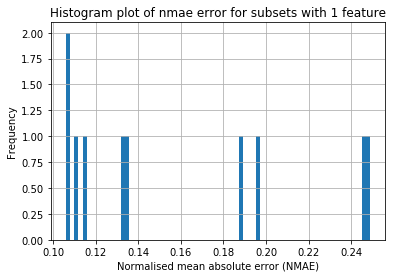

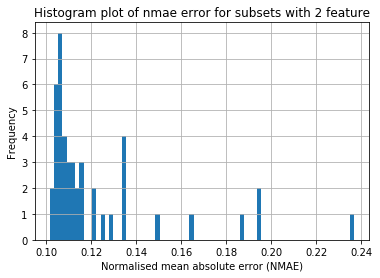

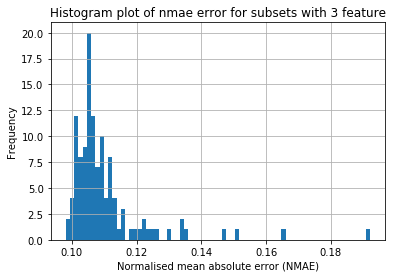

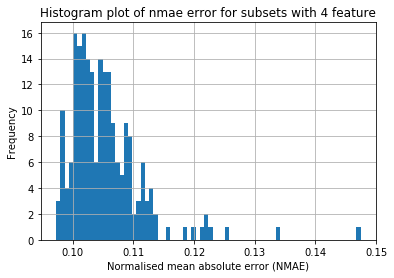

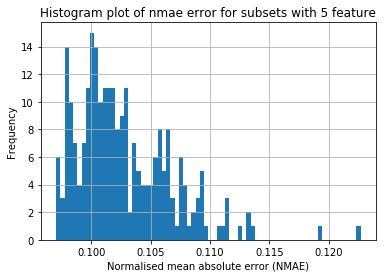

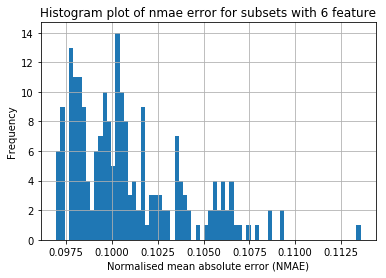

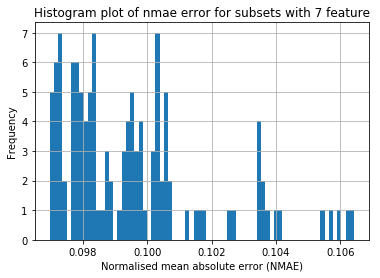

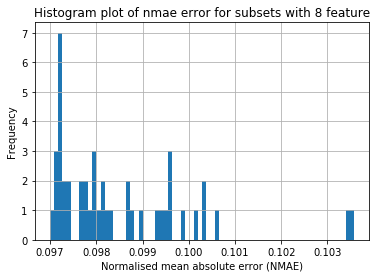

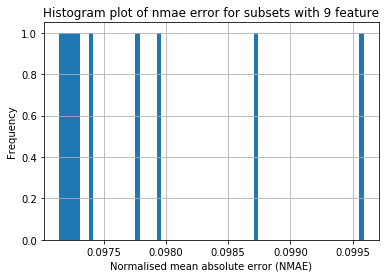

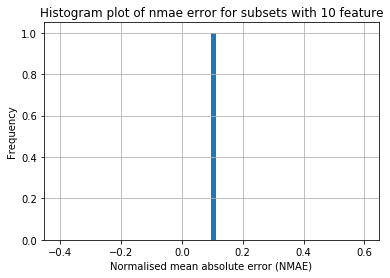

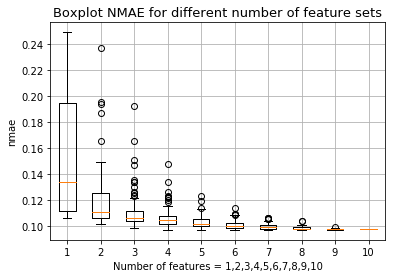


TASK 4.3 - Linear univariate feature selection(Heuristic method)

Feature : plist-sz
Correlation	   :  -0.826073
Correlation Square :   0.682396

Feature : totsck
Correlation	   :  -0.824974
Correlation Square :   0.680583

Feature : ldavg-1
Correlation	   :  -0.810988
Correlation Square :   0.657702

Feature : pgfree/s
Correlation	   :  0.217513
Correlation Square :   0.047312

Feature : proc/s
Correlation	   :  -0.249409
Correlation Square :   0.062205

Feature : all_%%usr
Correlation	   :  -0.542743
Correlation Square :   0.29457

Feature : file-nr
Correlation	   :  -0.752484
Correlation Square :   0.566232

Feature : cswch/s
Correlation	   :  -0.729571
Correlation Square :   0.532273

Feature : %%memused
Correlation	   :  -0.541347
Correlation Square :   0.293057

Feature : runq-sz
Correlation	   :  -0.798591
Correlation Square :   0.637748


Execution time (in seconds) :  1.1895999999999987
Correlation square of features in descending order
        NAME  CORRELATION SQUARE
0   pl

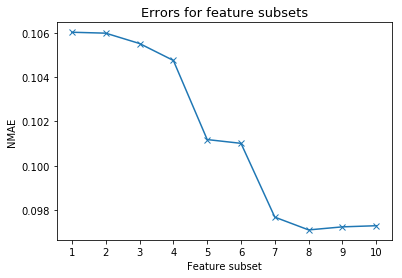

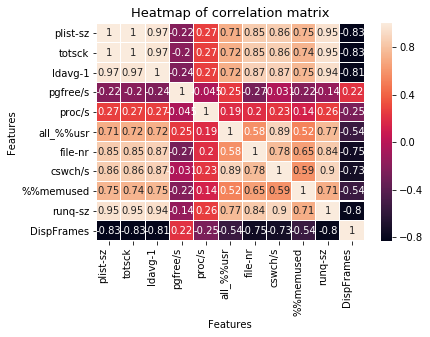

TASK 4.4 - Linear regression with L1 regularization
   #features!=0      NMAE
0             8  0.096843
1             7  0.097066
2             4  0.099828
3             3  0.104064
4             2  0.122040


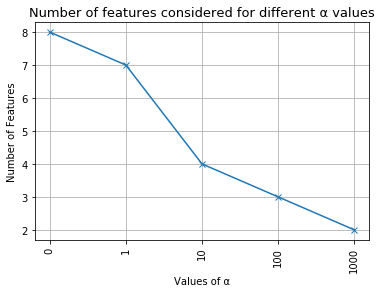

TASK 4.5
Execution time

Optimal Method (in seconds)   :  3.8163

Heuristic Method (in seconds) :  1.1896

Lasso Method (in seconds)     :  0.0293

Accuracy achieved

Optimal Method   :  0.096967

Heuristic Method :  0.097107

Lasso Method     :  0.096843


In [8]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as pl
import matplotlib.markers as mr
import itertools as iter
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import time

#TASK 4.1 - CONSTRUCT TRAINING SET AND TEST SET FROM DEVICE STATISTICS(X) AND SERVICE STATISTICS(Y)

X_temp= pd.read_csv('X.csv')  #load the datasets X and Y
Y_temp= pd.read_csv('Y.csv')

X= X_temp.drop(labels='TimeStamp', axis='columns')  #drop Timestamp from X as timestamp is not a feature of X
Y= Y_temp.drop(labels='TimeStamp',axis='columns')   #drop Timestamp from Y as timestamp is not a feature of Y

Y=Y.iloc[:,1] # Removing the UNAMED column and retaining the 2nd column of data frame (DispFrames)
X=X.iloc[:,0:10]

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1080, train_size=2520)



#TASK 4.2 - OPTIMAL METHOD

print('\033[1m'+"TASK 4.2 - Optimal method"+'\033[0m')

def findsubsets(dataframe,num_of_columns):
    return set(itertools.combinations(dataframe,num_of_columns))        

# Calculate the NMAE for each model 
start_time_subtask2=time.clock() # Start clock
nmae_cum=[]
feature=[]
for i in range(1,11):
    ss= findsubsets(X_train,i)
    for x_feature in ss:
            x_subset_train = pd.DataFrame(X_train, columns = x_feature)
            x_subset_test = pd.DataFrame(X_test, columns = x_feature)
            feature.append(x_subset_train)
            lr=LinearRegression()
            lr.fit(x_subset_train,y_train)
            y_predict = lr.predict(x_subset_test)
            mae = mean_absolute_error(y_test,y_predict);
            nmae = mae/(y_test.mean())
            nmae_cum.append([x_feature,nmae])
stop_time_subtask2=time.clock() # Stop clock
nmae_cum_dataframe=pd.DataFrame(nmae_cum,columns=['FEATURE SET','NMAE'])
sort_nmae=nmae_cum_dataframe.sort_values(by='NMAE',ascending=True)
print('Top 10 subsets with least NMAE in ascending order : \n',sort_nmae.iloc[0:10])


# Device statistics of the model with least NMAE
print('\nFeature list of the least NMAE linear regression model : \n',sort_nmae['FEATURE SET'].iloc[0])

# Histogram for X features
feature=[]
def nmae_compute(i):    
    nmae_err=[]
    ss= findsubsets(X_train,i)
    for x_feature in ss:
        x_subset_train = pd.DataFrame(X_train, columns = x_feature)
        x_subset_test = pd.DataFrame(X_test, columns = x_feature)
        #print("head : ",x_subset_train.head())
        feature.append(x_subset_train.head())
        lm=LinearRegression()
        lm.fit(x_subset_train,y_train)
        y_predict = lm.predict(x_subset_test)
        mean_y = y_test.mean();
        mae = mean_absolute_error(y_test,y_predict);
        nmae = (mae)/(mean_y)
        nmae_err.append(nmae)
    pl.figure()
    p1 = pl.hist(nmae_err, bins=72,orientation='vertical')
    pl.title('Histogram plot of nmae error for subsets with '+ str(i) + ' feature')
    pl.grid()
    #pl.legend(('1','2','3','4','5','6','7','8','9','10'))
    pl.xlabel('Normalised mean absolute error (NMAE)')
    pl.ylabel('Frequency')
    pl.show()
    return(nmae_err)  

nmae_plot_1=(nmae_compute(1))
nmae_plot_2=(nmae_compute(2))
nmae_plot_3=(nmae_compute(3))
nmae_plot_4=(nmae_compute(4))
nmae_plot_5=(nmae_compute(5))
nmae_plot_6=(nmae_compute(6))
nmae_plot_7=(nmae_compute(7))
nmae_plot_8=(nmae_compute(8))
nmae_plot_9=(nmae_compute(9))
nmae_plot_10=(nmae_compute(10))

nmae_all=[nmae_plot_1,nmae_plot_2,nmae_plot_3,nmae_plot_4,nmae_plot_5,nmae_plot_6,nmae_plot_7,nmae_plot_8,nmae_plot_9,nmae_plot_10]

# Box plot of NMAE for all linear regression subsets based on number of features selected.
pl.figure()
pl.title('Boxplot NMAE for different number of feature sets', fontsize=13)
pl.boxplot(nmae_all)
pl.grid()
pl.xlabel('Number of features = 1,2,3,4,5,6,7,8,9,10')
pl.ylabel('nmae')
pl.show()


#TASK 4.3 - LINEAR UNIVARIATE FEATURE SELECTION
print('\n\033[1m'+"TASK 4.3 - Linear univariate feature selection(Heuristic method)"+'\033[0m')

#Calculate Standard deviation on Y_train and mean error on Y_train values
start_time_subtask3=time.clock() # Start clock
Y_mae=np.empty(0)
Y_std = y_train.std()
#print("Standard Deviation for "+y_train.name+" : "+str(Y_std))
print()
y_t = y_train.tolist()
for val in y_train:
     y_mean_err=val-y_train.mean()
     Y_mae=np.append(Y_mae,y_mean_err)

#Calculate SD,mean and correlation on X_train features
#Store correlation squares
corr_matrix=[] #correlation matrix
corr_squ=[]#correlation square numpy array
for col in X_train.columns:
    multiplier=0
    correlation=0
    X_feature = X_train[col]
    X_std = X_feature.std()
    print("Feature : "+'\033[1m'+col+'\033[0m')
    #print("Standard Deviation : ",X_std)
    X_mae=np.empty(0)
    #print("Mean : ",X_feature.mean())
    for val in X_feature:
        x_mean_err = val-X_feature.mean()
        X_mae=np.append(X_mae,x_mean_err)
    multiplier= np.multiply(X_mae,Y_mae)
    #print(multiplier)
    multiplier = multiplier/(X_std*Y_std)
    #print("multiplier for "+col+" : ",multiplier)
    multiplier=multiplier.sum()
    #print("Summation : ",multiplier)
    correlation=multiplier/len(X_feature)
    print("Correlation\t   : ",round(correlation,6))
    corr_matrix.append(correlation)
    correlation_square= np.square(correlation)
    corr_squ.append([col,correlation_square])
    #print(corr_squ)
    print("Correlation Square :  ", round(correlation_square,6))
    print()

stop_time_subtask3=time.clock() # Stop clock
print("\nExecution time (in seconds) : ",(stop_time_subtask3-start_time_subtask3))
print('\033[1m'+"Correlation square of features in descending order"+'\033[0m')
co_mat=pd.DataFrame(corr_matrix,columns=['correlation value'])
co_sq=pd.DataFrame(corr_squ,columns=['NAME','CORRELATION SQUARE'])    
#print(co_sq)

sorted_cosq=co_sq.sort_values(by="CORRELATION SQUARE",ascending=False)
print(sorted_cosq)

#Calculate NMAE for feature subsets
print('\033[1m'+"\nNMAE "+'\033[0m' )
feature_subset=[]
i=1
j=0
error_array=[]
while (i<=10):
    while (j<=i):
        #print(j)
        for name in iter.islice(sorted_cosq["NAME"], 0,j):
            feature_subset.append(name)
        j+=1
    Xtrain_feature_set=X_train[feature_subset]
    Xtest_feature_set=X_test[feature_subset]
    regr_obj=LinearRegression()
    regr_obj.fit(Xtrain_feature_set,y_train)
    y_predict=regr_obj.predict(Xtest_feature_set)
    MAE=mean_absolute_error(y_test,y_predict)
    NMAE=(MAE/y_test.mean())
    print(str(feature_subset)+" : "+str(round(NMAE,6)))
    Xtrain_feature_set=Xtrain_feature_set.iloc[0:0]
    Xtest_feature_set=Xtest_feature_set.iloc[0:0]
    error_array=np.append(error_array,NMAE)   
    feature_subset.clear()
    i+=1

# Plot Error graph for feature subsets K={1,2,..,10}
pl.figure()
pl.title("Errors for feature subsets",fontsize=13)
pl.xlabel("Feature subset")
pl.ylabel("NMAE")
pl.plot(['1','2','3','4','5','6','7','8','9','10'],error_array,label='linear',marker='x')
pl.show()      
        
# Heat plot    
features = ['plist-sz',  # =1
            'totsck',    # =2
            'ldavg-1',   # =3
            'pgfree/s',  # =4
            'proc/s',    # =5
            'all_%%usr', # =6
            'file-nr',   # =7
            'cswch/s',   # =8
            '%%memused', # =9
            'runq-sz']   # =10

combined_dataframe= pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
corr_matrix=combined_dataframe.corr()
ax= sns.heatmap(corr_matrix, annot=True, linewidth=0.1)
ax.set(xlabel='Features',ylabel='Features')
pl.title('Heatmap of correlation matrix',fontsize=13)
pl.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="default")
pl.show()




# TASK 4.4 - LINEAR REGRESSION WITH L1 REGULARIZATION ( LASSO )

print('\033[1m'+'TASK 4.4 - Linear regression with L1 regularization'+'\033[0m')
start_time_subtask4= time.clock()   #start time
lasso_table=[]
def call_lasso(power):
    lasso= Lasso(alpha=pow(10,power), max_iter=10e5)
    lasso.fit(X_train,y_train)
    y_lasso_predict=lasso.predict(X_test)
    mae = mean_absolute_error(y_test,y_lasso_predict);
    nmae = mae/(y_test.mean())
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    features_used = np.sum(lasso.coef_!=0)
    #nmae_list=np.append(nmae_list,nmae)
    lasso_table.append([features_used,nmae])
    #print ("\ntraining score:", train_score)
    #print ("test score: ", test_score)
    #print ("number of features used: ", features_used)
    #print ("NMAE: ",nmae)

for i in range(-1,4):
    call_lasso(i)
    
stop_time_subtask4=time.clock()
lasso_dataframe=pd.DataFrame(lasso_table,columns=['#features!=0','NMAE'])
print(lasso_dataframe)

# Plot of α against the number of features 
pl.figure()
pl.title("Number of features considered for different α values",fontsize=13)
pl.xlabel("Values of α")
pl.ylabel("Number of Features")
x_scale=['0','1','10','100','1000']
pl.plot(x_scale, lasso_dataframe['#features!=0'].tolist(),marker='x')
#pl.ylim([0,10])
#pl.xlim([0,1000])
pl.xticks(rotation=90)
pl.grid(True)
pl.show() 
# pl.figure()
# pl.title("Number of features considered for different α values",fontsize=13)
# pl.xlabel("Values of α")
# pl.ylabel("Number of Features")
# x_scale=['0','1','10','100','1000']
# pl.semilogx(x_scale, lasso_dataframe['#features!=0'].tolist(),marker='x')
# pl.ylim([0,10])
# pl.xlim([0.1,1000])
# pl.xticks(rotation=90)
# pl.grid(True)
# pl.show() 

    
# TASK 4.5
print('\033[1m'+'TASK 4.5'+'\033[0m')
print('\033[1m'+'Execution time'+'\033[0m')
print("\nOptimal Method (in seconds)   : ", round(stop_time_subtask2-start_time_subtask2,4))
print("\nHeuristic Method (in seconds) : ", round(stop_time_subtask3-start_time_subtask3,4))
print("\nLasso Method (in seconds)     : ", round(stop_time_subtask4-start_time_subtask4,4))
print('\033[1m'+'\nAccuracy achieved'+'\033[0m')
print("\nOptimal Method   : ", round(sort_nmae['NMAE'].iloc[0],6))
print("\nHeuristic Method : ", round(error_array.min(),6))
print("\nLasso Method     : ", round(lasso_dataframe['NMAE'].iloc[0],6))

Mean Absolute error: 1.18
Mean of Y test set observations :  19.14208
Normalised Mean Absolute Error :  0.06143

NAIVE METHOD RESULTS: 
Mean Absolute error: 5.07
Mean of Y train set observations :  18.77379
Normalised Mean Absolute Error for Naive method :  0.26982


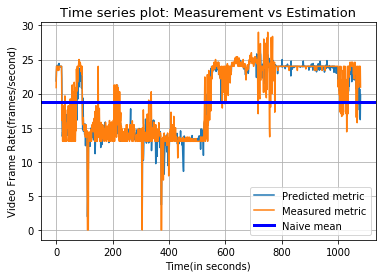

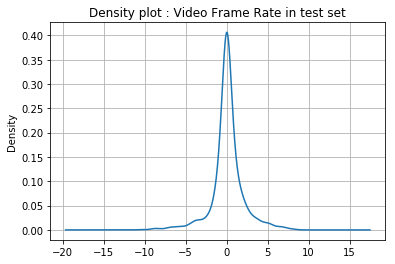

    Features  Importance
0   plist-sz    0.752100
8  %%memused    0.057579
2    ldavg-1    0.043750
1     totsck    0.042690
6    file-nr    0.022699
3   pgfree/s    0.020632
9    runq-sz    0.018772
7    cswch/s    0.016359
5  all_%%usr    0.013489
4     proc/s    0.011932

NMAE 
['plist-sz'] : 0.080889
['plist-sz', '%%memused'] : 0.066477
['plist-sz', '%%memused', 'ldavg-1'] : 0.060583
['plist-sz', '%%memused', 'ldavg-1', 'totsck'] : 0.060293
['plist-sz', '%%memused', 'ldavg-1', 'totsck', 'file-nr'] : 0.060177
['plist-sz', '%%memused', 'ldavg-1', 'totsck', 'file-nr', 'pgfree/s'] : 0.061108
['plist-sz', '%%memused', 'ldavg-1', 'totsck', 'file-nr', 'pgfree/s', 'runq-sz'] : 0.062302
['plist-sz', '%%memused', 'ldavg-1', 'totsck', 'file-nr', 'pgfree/s', 'runq-sz', 'cswch/s'] : 0.063458
['plist-sz', '%%memused', 'ldavg-1', 'totsck', 'file-nr', 'pgfree/s', 'runq-sz', 'cswch/s', 'all_%%usr'] : 0.060876
['plist-sz', '%%memused', 'ldavg-1', 'totsck', 'file-nr', 'pgfree/s', 'runq-sz', 'cswch/s'

In [6]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as pl
import matplotlib.markers as mr
import itertools as iter
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import time

#TASK 4.1 - Train the model using Random Forest Regressor and display NMAE

X_temp= pd.read_csv('X.csv')  #load the datasets X and Y
Y_temp= pd.read_csv('Y.csv')
X= X_temp.drop(labels='TimeStamp', axis='columns')  #drop Timestamp from X as timestamp is not a feature of X
Y= Y_temp.drop(labels='TimeStamp',axis='columns')   #drop Timestamp from Y as timestamp is not a feature of Y
Y=Y.iloc[:,1] # Removing the UNAMED column and retaining the 2nd column of data frame (DispFrames)
X=X.iloc[:,0:10]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1080, train_size=2520)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)
MAE=mean_absolute_error(y_test,y_predict)
NMAE=(MAE/y_test.mean())                                  
print("Mean Absolute error: %.2f" % round(MAE,5))
print("Mean of Y test set observations : ",round(y_test.mean(),5))
print("Normalised Mean Absolute Error : ", round(NMAE,5) )



#TASK 5.2 - Naive method and time series plot

#NAIVE METHOD 
naive_mean= y_train.mean()
naive_list=[]
for i in range(0,2520):
    naive_list.append(naive_mean)
naive_df = pd.DataFrame(naive_list,columns=['naive mean'])
naive_MAE= mean_absolute_error(y_train,naive_df)
naive_NMAE= naive_MAE/naive_mean
print("\nNAIVE METHOD RESULTS: \nMean Absolute error: %.2f" % round(naive_MAE,5))
print("Mean of Y train set observations : ",round(naive_mean,5))
print("Normalised Mean Absolute Error for Naive method : ", round(naive_NMAE,5))


#preparation of y_predict and y_test by sorting indices
y_predict_df=pd.DataFrame({'Index':y_test.index,'y_predict':y_predict})

y_test_copy=y_test.copy(deep=True)
y_test_copy.sort_index(inplace=True)
y_predict_df_sorted=y_predict_df.sort_values(y_predict_df.columns[0],ascending=True)

y_test_copy_sorted=y_test_copy.reset_index()
y_predict_df_sorted=y_predict_df_sorted.reset_index()

y_predict_df_sorted= y_predict_df_sorted.drop(labels=['index','Index'], axis='columns')
y_test_copy_sorted= y_test_copy_sorted.drop(labels=['index'], axis='columns')

# Plot of measurement and estimation on Test set
pl.figure()
pl.title("Time series plot: Measurement vs Estimation",fontsize=13)
pl.xlabel("Time(in seconds)")
pl.ylabel("Video Frame Rate(frames/second)")
pl.plot(y_predict_df_sorted.index,y_predict_df_sorted,label='linear')
pl.plot(y_test_copy_sorted.index,y_test_copy_sorted,label='linear')
pl.axhline(xmin=0,xmax=1080,y=naive_mean,linewidth=3,color='b',label="Naive mean")
pl.legend(('Predicted metric','Measured metric','Naive mean'),loc=4)
pl.grid()
pl.show() 

#TASK 5.3 - Density plot for the prediction errors in the test set.
p_err = y_test - y_predict
pl.figure()
p_err_plot = p_err.plot.kde(y=["DispFrames"])
p_err_plot.set_title('Density plot : Video Frame Rate in test set')
p_err_plot.grid()
pl.show()

#Task 5.4 - Feature ranking and comparision with previous results of task 4
start_time=time.clock()
feature_ranking=rf.feature_importances_
feature_list=['plist-sz',  # =1
            'totsck',    # =2
            'ldavg-1',   # =3
            'pgfree/s',  # =4
            'proc/s',    # =5
            'all_%%usr', # =6
            'file-nr',   # =7
            'cswch/s',   # =8
            '%%memused', # =9
            'runq-sz']   # =10
sorted_fr=pd.DataFrame({'Features':feature_list,'Importance':feature_ranking})
sorted_fr=sorted_fr.sort_values(sorted_fr.columns[1],ascending=False)
print(sorted_fr)

#Calculate NMAE for feature subsets
print('\033[1m'+"\nNMAE "+'\033[0m' )
feature_subset=[]
i=1
j=0
error_array=[]
while (i<=10):
    while (j<=i):
        #print(j)
        for name in iter.islice(sorted_fr["Features"], 0,j):
            feature_subset.append(name)
        j+=1
    Xtrain_feature_set=X_train[feature_subset]
    Xtest_feature_set=X_test[feature_subset]
    fr=RandomForestRegressor()
    fr.fit(Xtrain_feature_set,y_train)
    y_predict=fr.predict(Xtest_feature_set)
    MAE=mean_absolute_error(y_test,y_predict)
    NMAE=(MAE/y_test.mean())
    print(str(feature_subset)+" : "+str(round(NMAE,6)))
    Xtrain_feature_set=Xtrain_feature_set.iloc[0:0]
    Xtest_feature_set=Xtest_feature_set.iloc[0:0]
    error_array=np.append(error_array,NMAE)   
    feature_subset.clear()
    i+=1

stop_time=time.clock()
print("\nExecution time for Random Forest (in seconds):", stop_time-start_time)
    

#Task 5.5 - NMAE for training and test set

print('\033[1m'+'Random Forest'+'\033[0m')
#Test Set
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)
MAE=mean_absolute_error(y_test,y_predict)
NMAE=(MAE/y_test.mean())                                  
print("NMAE on test set : ", round(NMAE,5) )

#Training set
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predict=rf.predict(X_train)
MAE=mean_absolute_error(y_train,y_predict)
NMAE=(MAE/y_train.mean())                                  
print("NMAE on training set : ", round(NMAE,5) )

#Linear Regression
print('\033[1m'+'Linear Regression'+'\033[0m')
#test set
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
MAE=mean_absolute_error(y_test,y_predict)
NMAE=(MAE/y_test.mean())                                  
print("NMAE on test set: ", round(NMAE,5) )


#training set
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_train)
MAE=mean_absolute_error(y_train,y_predict)
NMAE=(MAE/y_train.mean())                                  
print("NMAE on training set : ", round(NMAE,5) )